In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
hints = pd.read_csv("HINTS_erdos.csv")

In [3]:
hints.count()
#print(hints.shape)

HHID                3630
PERSONID            3630
Stratum             3630
APP_REGION           259
HIGHSPANLI          3630
                    ... 
AgeDX               3630
TimeSinceDX         3630
smokeStat           3630
PHQ4                3630
IncomeRanges_IMP    3630
Length: 357, dtype: int64

In [4]:
hints =  hints.drop(['APP_REGION', 'PERSONID', 'HHID'], axis=1, inplace=False)

In [5]:
#set all the features with numerical values to integers  and character as categorical

# Convert numerical features to integers
numerical_features = hints.select_dtypes(include=['int64', 'float64']).columns
hints[numerical_features] = hints[numerical_features].astype('int32')

# Convert character features to categorical
character_features = hints.select_dtypes(include=['object']).columns
hints[character_features] = hints[character_features].astype('category')

In [6]:
#turn all values less than 0 to NA in integer type features
hints[numerical_features] = hints[numerical_features].applymap(lambda x: np.nan if x < 0 else x)
hints.head()

Stratum  HIGHSPANLI  HISPSURNAME  HISP_HH  Treatment_C2  RUC2003  CENSDIV  \
0      HM           2            2        2             1        1        5   
1      LM           2            2        2             1        6        2   
2      HM           2            2        2             1        1        3   
3      HM           2            2        2             1        1        5   
4      HM           2            2        2             1        4        5   

   CENSREG  FormType  Language_Flag  ...  EducA  EducB  RaceEthn  HHInc   BMI  \
0        3         2              1  ...    3.0    3.0       2.0    5.0  29.0   
1        1         2              1  ...    2.0    2.0       2.0    NaN  27.0   
2        2         2              1  ...    4.0    4.0       5.0    5.0  20.0   
3        3         2              1  ...    4.0    5.0       3.0    5.0  22.0   
4        3         2              1  ...    NaN    NaN       2.0    3.0  28.0   

  AgeDX  TimeSinceDX  smokeStat  PHQ4  IncomeRanges_IMP  
0   NaN          NaN        1.0   2.0               7.0  
1   NaN          NaN        2.0   1.0               4.0  
2   NaN          NaN        1.0   2.0               8.0  
3   NaN          NaN        3.0   1.0               9.0  
4   NaN          NaN        3.0   0.0               5.0  

[5 rows x 354 columns]

## **Data subset on "Your Overall Health"**
*I'm doing on one subset of dataset. This can be done on whole dataset too.*


In [7]:
YourOverallHealth = (["GeneralHealth", "OwnAbilityTakeCareHealth", "MedConditions_Diabetes", "MedConditions_HighBP", "MedConditions_HeartCondition", "MedConditions_LungDisease", "MedConditions_Arthritis", "MedConditions_Depression", "SleepWorkdayHr", "SleepWorkdayMn", "SleepWeekendHr", "SleepWeekendMn", "Height_Feet", "Height_Inches", "Weight", "WeightIntention", "WeightOpinion", "LittleInterest", "Hopeless", "Nervous", "Worrying", "EmotionalSupport", "TalkHealthFriends", "HelpDailyChores"])

In [8]:
hints_YOH = hints[YourOverallHealth]

In [9]:
hints_YOH['EverHadCancer'] = hints.EverHadCancer

/var/folders/pj/smtb5qn15451pgf_1y_gw7k00000gn/T/ipykernel_48146/2939169573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hints_YOH['EverHadCancer'] = hints.EverHadCancer


In [10]:
hints_YOH

GeneralHealth  OwnAbilityTakeCareHealth  MedConditions_Diabetes  \
0               2.0                       1.0                     2.0   
1               2.0                       1.0                     2.0   
2               2.0                       2.0                     2.0   
3               2.0                       2.0                     2.0   
4               3.0                       2.0                     2.0   
...             ...                       ...                     ...   
3625            4.0                       4.0                     2.0   
3626            3.0                       3.0                     1.0   
3627            3.0                       3.0                     2.0   
3628            3.0                       3.0                     2.0   
3629            3.0                       3.0                     2.0   

      MedConditions_HighBP  MedConditions_HeartCondition  \
0                      2.0                           2.0   
1                      1.0                           2.0   
2                      2.0                           2.0   
3                      2.0                           2.0   
4                      1.0                           2.0   
...                    ...                           ...   
3625                   2.0                           2.0   
3626                   1.0                           2.0   
3627                   1.0                           2.0   
3628                   2.0                           2.0   
3629                   2.0                           2.0   

      MedConditions_LungDisease  MedConditions_Arthritis  \
0                           2.0                      2.0   
1                           2.0                      1.0   
2                           1.0                      2.0   
3                           2.0                      2.0   
4                           2.0                      2.0   
...                         ...                      ...   
3625                        2.0                      1.0   
3626                        2.0                      1.0   
3627                        1.0                      2.0   
3628                        2.0                      2.0   
3629                        2.0                      1.0   

      MedConditions_Depression  SleepWorkdayHr  SleepWorkdayMn  ...  \
0                          1.0             7.0             0.0  ...   
1                          1.0             6.0             NaN  ...   
2                          2.0             8.0             0.0  ...   
3                          2.0             6.0             0.0  ...   
4                          2.0             8.0             0.0  ...   
...                        ...             ...             ...  ...   
3625                       1.0             8.0             0.0  ...   
3626                       2.0             8.0             NaN  ...   
3627                       1.0             9.0             0.0  ...   
3628                       2.0             5.0             0.0  ...   
3629                       1.0             5.0             0.0  ...   

      WeightIntention  WeightOpinion  LittleInterest  Hopeless  Nervous  \
0                 NaN            4.0             4.0       4.0      2.0   
1                 1.0            3.0             4.0       4.0      3.0   
2                 2.0            2.0             4.0       4.0      3.0   
3                 1.0            3.0             4.0       4.0      3.0   
4                 2.0            2.0             4.0       4.0      4.0   
...               ...            ...             ...       ...      ...   
3625              4.0            1.0             3.0       3.0      3.0   
3626              4.0            4.0             4.0       4.0      4.0   
3627              1.0            3.0             3.0       4.0      3.0   
3628              4.0            4.0             3.0       3.0      3.0   
3629     

### **Visualising NAs**

In [11]:
print(hints_YOH.isna().sum())

GeneralHealth                    107
OwnAbilityTakeCareHealth         108
MedConditions_Diabetes           144
MedConditions_HighBP             133
MedConditions_HeartCondition     131
MedConditions_LungDisease        136
MedConditions_Arthritis          138
MedConditions_Depression         133
SleepWorkdayHr                   185
SleepWorkdayMn                  1831
SleepWeekendHr                   216
SleepWeekendMn                  1843
Height_Feet                      148
Height_Inches                      0
Weight                           159
WeightIntention                  381
WeightOpinion                    144
LittleInterest                   183
Hopeless                         199
Nervous                          195
Worrying                         191
EmotionalSupport                 119
TalkHealthFriends                117
HelpDailyChores                  125
EverHadCancer                     31
dtype: int64


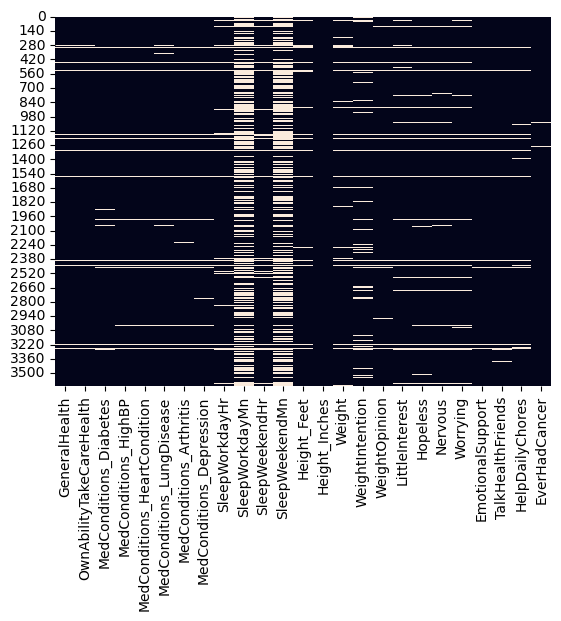

In [12]:
sns.heatmap(hints_YOH.isnull(), cbar=False)
plt.show()

**Removing the colums with high number of missing values**

In [13]:
#hints_YOH.SleepWorkdayMn
print(hints_YOH.SleepWeekendMn.isna().sum())
print(hints_YOH.SleepWorkdayMn.isna().sum())


1843
1831


In [14]:
hints_YOH = hints_YOH.drop(['SleepWorkdayMn', 'SleepWeekendMn'], axis=1, inplace=False)

In [15]:
hints_YOH.shape

(3630, 23)

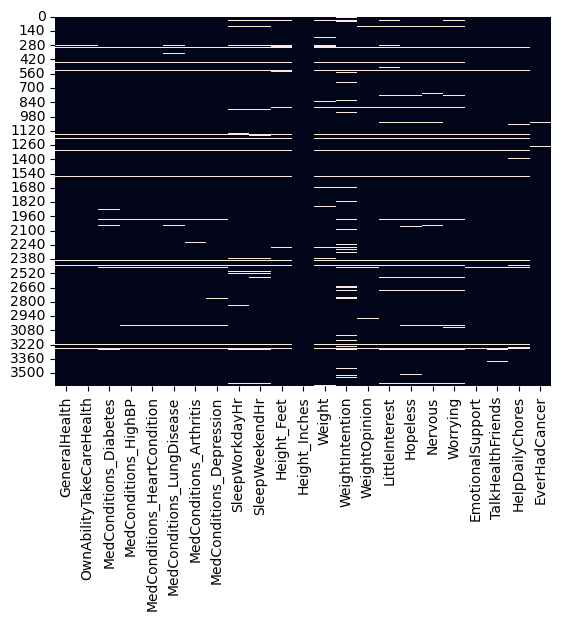

In [16]:
sns.heatmap(hints_YOH.isnull(), cbar=False)
plt.show()

In [17]:
hints_YOH = hints_YOH.dropna()

In [18]:
hints_YOH.shape

(2924, 23)

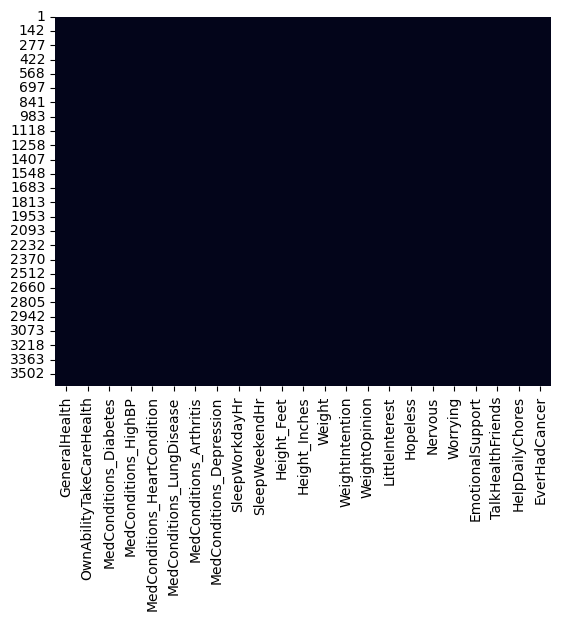

In [19]:
sns.heatmap(hints_YOH.isnull(), cbar=False)
plt.show()

In [20]:
hints_YOH.to_csv("YourOverallHealth.csv")

In [21]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

In [22]:
#newFeatures = (["UseInternet", "Internet_DialUp", "Internet_BroadBnd", "Internet_Cell", "Internet_WiFi", "Internet_Other", "InternetCancerInfoSelf", "InternetCancerInfoSite"])
#hints_UIFI_New = hints_UIFI[newFeatures]
#hints_UIFI_New
hints_YOH

GeneralHealth  OwnAbilityTakeCareHealth  MedConditions_Diabetes  \
1               2.0                       1.0                     2.0   
2               2.0                       2.0                     2.0   
3               2.0                       2.0                     2.0   
4               3.0                       2.0                     2.0   
5               2.0                       3.0                     2.0   
...             ...                       ...                     ...   
3625            4.0                       4.0                     2.0   
3626            3.0                       3.0                     1.0   
3627            3.0                       3.0                     2.0   
3628            3.0                       3.0                     2.0   
3629            3.0                       3.0                     2.0   

      MedConditions_HighBP  MedConditions_HeartCondition  \
1                      1.0                           2.0   
2                      2.0                           2.0   
3                      2.0                           2.0   
4                      1.0                           2.0   
5                      2.0                           2.0   
...                    ...                           ...   
3625                   2.0                           2.0   
3626                   1.0                           2.0   
3627                   1.0                           2.0   
3628                   2.0                           2.0   
3629                   2.0                           2.0   

      MedConditions_LungDisease  MedConditions_Arthritis  \
1                           2.0                      1.0   
2                           1.0                      2.0   
3                           2.0                      2.0   
4                           2.0                      2.0   
5                           2.0                      2.0   
...                         ...                      ...   
3625                        2.0                      1.0   
3626                        2.0                      1.0   
3627                        1.0                      2.0   
3628                        2.0                      2.0   
3629                        2.0                      1.0   

      MedConditions_Depression  SleepWorkdayHr  SleepWeekendHr  ...  \
1                          1.0             6.0             7.0  ...   
2                          2.0             8.0             8.0  ...   
3                          2.0             6.0             6.0  ...   
4                          2.0             8.0             8.0  ...   
5                          2.0             5.0             8.0  ...   
...                        ...             ...             ...  ...   
3625                       1.0             8.0             8.0  ...   
3626                       2.0             8.0             8.0  ...   
3627                       1.0             9.0             8.0  ...   
3628                       2.0             5.0             7.0  ...   
3629                       1.0             5.0             5.0  ...   

      WeightIntention  WeightOpinion  LittleInterest  Hopeless  Nervous  \
1                 1.0            3.0             4.0       4.0      3.0   
2                 2.0            2.0             4.0       4.0      3.0   
3                 1.0            3.0             4.0       4.0      3.0   
4                 2.0            2.0             4.0       4.0      4.0   
5                 1.0            4.0             4.0       3.0      3.0   
...               ...            ...             ...       ...      ...   
3625              4.0            1.0             3.0       3.0      3.0   
3626              4.0            4.0             4.0       4.0      4.0   
3627              1.0            3.0             3.0       4.0      3.0   
3628              4.0            4.0             3.0       3.0      3.0   
3629     

In [23]:
X,y = hints_YOH.drop("EverHadCancer", axis=1), hints_YOH.EverHadCancer

In [24]:
X.shape

(2924, 22)

In [25]:
estimator1 = LinearSVC(C=1000, max_iter=100000, dual = True)
#estimator2 = LinearSVC(C=1000, max_iter=100000, dual = True)

## Finding top10 Features

In [26]:
# finding top10 Features
selector = RFE(estimator1, n_features_to_select=10, step=1)
selector = selector.fit(X,y)

/Users/pankazsingh/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/pankazsingh/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/pankazsingh/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/pankazsingh/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/pankazsingh/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/pankazsingh/opt/miniconda3/lib/python3

In [27]:
print(selector.support_)
print(selector.ranking_)
print(selector.n_features_)
print(selector.feature_names_in_)
print(selector.feature_names_in_[selector.support_])
selected_features = selector.feature_names_in_[selector.support_]
selected_features.shape

[False  True False  True  True  True  True False  True False False False
 False False False False  True False  True False  True  True]
[ 3  1  5  1  1  1  1  6  1 11  8  9 13 10  7  2  1  4  1 12  1  1]
10
['GeneralHealth' 'OwnAbilityTakeCareHealth' 'MedConditions_Diabetes'
 'MedConditions_HighBP' 'MedConditions_HeartCondition'
 'MedConditions_LungDisease' 'MedConditions_Arthritis'
 'MedConditions_Depression' 'SleepWorkdayHr' 'SleepWeekendHr'
 'Height_Feet' 'Height_Inches' 'Weight' 'WeightIntention' 'WeightOpinion'
 'LittleInterest' 'Hopeless' 'Nervous' 'Worrying' 'EmotionalSupport'
 'TalkHealthFriends' 'HelpDailyChores']
['OwnAbilityTakeCareHealth' 'MedConditions_HighBP'
 'MedConditions_HeartCondition' 'MedConditions_LungDisease'
 'MedConditions_Arthritis' 'SleepWorkdayHr' 'Hopeless' 'Worrying'
 'TalkHealthFriends' 'HelpDailyChores']


(10,)

In [28]:
#np.append(selected_features, "EverHadCancer")
#print(selected_features)
hints_YOH[np.append(selected_features, "EverHadCancer")]
#selector.support_

OwnAbilityTakeCareHealth  MedConditions_HighBP  \
1                          1.0                   1.0   
2                          2.0                   2.0   
3                          2.0                   2.0   
4                          2.0                   1.0   
5                          3.0                   2.0   
...                        ...                   ...   
3625                       4.0                   2.0   
3626                       3.0                   1.0   
3627                       3.0                   1.0   
3628                       3.0                   2.0   
3629                       3.0                   2.0   

      MedConditions_HeartCondition  MedConditions_LungDisease  \
1                              2.0                        2.0   
2                              2.0                        1.0   
3                              2.0                        2.0   
4                              2.0                        2.0   
5                              2.0                        2.0   
...                            ...                        ...   
3625                           2.0                        2.0   
3626                           2.0                        2.0   
3627                           2.0                        1.0   
3628                           2.0                        2.0   
3629                           2.0                        2.0   

      MedConditions_Arthritis  SleepWorkdayHr  Hopeless  Worrying  \
1                         1.0             6.0       4.0       4.0   
2                         2.0             8.0       4.0       3.0   
3                         2.0             6.0       4.0       4.0   
4                         2.0             8.0       4.0       4.0   
5                         2.0             5.0       3.0       2.0   
...                       ...             ...       ...       ...   
3625                      1.0             8.0       3.0       3.0   
3626                      1.0             8.0       4.0       4.0   
3627                      2.0             9.0       4.0       3.0   
3628                      2.0             5.0       3.0       2.0   
3629                      1.0             5.0       1.0       1.0   

      TalkHealthFriends  HelpDailyChores  EverHadCancer  
1                   1.0              1.0            2.0  
2                   1.0              1.0            2.0  
3                   1.0              1.0            2.0  
4                   1.0              1.0            2.0  
5                   1.0              1.0            2.0  
...                 ...              ...            ...  
3625                1.0              1.0            1.0  
3626                1.0              1.0            2.0  
3627                1.0              2.0            2.0  
3628                1.0              1.0            2.0  
3629                1.0              2.0            2.0  

[2924 rows x 11 columns]

In [29]:
#ct = pd.crosstab(hints_YOH['Internet_DialUp'], hints_YOH['EverHadCancer'], normalize='index')
#print(ct)

## Fitting a classifier on top 10 features

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
## Make the split
train, test = train_test_split(hints_YOH[np.append(selected_features, "EverHadCancer")],
                                            shuffle=True,
                                            random_state=21,
                                            stratify=hints_YOH['EverHadCancer'])

In [32]:
test.shape

(731, 11)

In [33]:
train.EverHadCancer.value_counts()

EverHadCancer
2.0    1918
1.0     275
Name: count, dtype: int64

In [34]:
### Class balancing
class_count_0, class_count_1 = train['EverHadCancer'].value_counts()
class_count_1

275

In [35]:
class_0 = train[train['EverHadCancer'] == 2]
class_1 = train[train['EverHadCancer'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1918, 11)
class 1: (275, 11)


In [36]:
class_0_under = class_0.sample(class_count_1)
balanced = pd.concat([class_0_under, class_1], axis=0)
balanced.shape

(550, 11)

In [37]:
balanced.EverHadCancer.value_counts()

EverHadCancer
2.0    275
1.0    275
Name: count, dtype: int64

In [38]:
balanced.shape

(550, 11)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [40]:
## import here
from sklearn.model_selection import StratifiedKFold

In [41]:
## make the kfold object
kfold = StratifiedKFold(n_splits=5,
                           shuffle=True,
                           random_state=111)

In [42]:
## loop through train sets and test sets
i = 1
for train_index, test_index in kfold.split(balanced[selected_features], balanced['EverHadCancer']):
    ## print the beer type splits
    print("Split",i)
    print("CV Training Set Split")
    print(balanced.iloc[train_index].EverHadCancer.value_counts(normalize=True))
    
    print()
    
    print("CV Holdout Set Split")
    print(balanced.iloc[test_index].EverHadCancer.value_counts(normalize=True))
    
    print("+++++++++++++++",i)
    i = i + 1

Split 1
CV Training Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64

CV Holdout Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64
+++++++++++++++ 1
Split 2
CV Training Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64

CV Holdout Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64
+++++++++++++++ 2
Split 3
CV Training Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64

CV Holdout Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64
+++++++++++++++ 3
Split 4
CV Training Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64

CV Holdout Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64
+++++++++++++++ 4
Split 5
CV Training Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: proportion, dtype: float64

CV Holdout Set Split
EverHadCancer
2.0    0.5
1.0    0.5
Name: propo

In [43]:
knn_pipe = Pipeline([('scale', StandardScaler()),('knn', KNeighborsClassifier(5))])
knn_pipe.fit(train, train.EverHadCancer)

Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

In [44]:
def accuracy(true, predicted):
    return np.sum(true==predicted)/len(predicted)

i = 1
for train_index, test_index in kfold.split(balanced[selected_features], balanced['EverHadCancer']):
    ## print the beer type splits
    print("Split",i)
    print("CV Training Set Split")
    #print(balanced.iloc[train_index].EverHadCancer.value_counts(normalize=True))
    #print("Shape: ", balanced.iloc[train_index].shape)
    knn_pipe.fit(balanced.iloc[train_index,range(1, 10)],
           balanced.iloc[train_index].EverHadCancer)
    
    print("CV Holdout Set Split")
    #print(balanced.iloc[test_index].EverHadCancer.value_counts(normalize=True))
    knn_pipe.predict(balanced.iloc[test_index,range(1, 10)])
    pred = knn_pipe.predict(balanced.iloc[test_index,range(1, 10)])
    
    
    print("Test Split Accuracy:", accuracy(balanced.iloc[test_index].EverHadCancer.values, pred))
    print("+++++++++++++++",i)
    i = i + 1

Split 1
CV Training Set Split
CV Holdout Set Split
Test Split Accuracy: 0.6090909090909091
+++++++++++++++ 1
Split 2
CV Training Set Split
CV Holdout Set Split
Test Split Accuracy: 0.6181818181818182
+++++++++++++++ 2
Split 3
CV Training Set Split
CV Holdout Set Split
Test Split Accuracy: 0.4818181818181818
+++++++++++++++ 3
Split 4
CV Training Set Split
CV Holdout Set Split
Test Split Accuracy: 0.5545454545454546
+++++++++++++++ 4
Split 5
CV Training Set Split
CV Holdout Set Split
Test Split Accuracy: 0.5636363636363636
+++++++++++++++ 5


In [45]:
pred = knn_pipe.predict(test.iloc[:,range(1, 10)])
print("Test set Accuracy:", accuracy(test.EverHadCancer.values, pred))

Test set Accuracy: 0.6853625170998632
